In [76]:
#loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import  GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

## Loading Csv Dataset

In [77]:
df=pd.read_csv("/content/Churn Modeling J.csv")

In [78]:
## checking out the first 10 rows
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [79]:
# Checking the columns
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Dat Cleaning

In [80]:
# Checking duplicates
duplicate_rows = df[df.duplicated()]
# Checking if there are any duplicate rows
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)

No duplicate rows found.


In [81]:
#checking for null values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [82]:
#checking the data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [83]:
#from the data types we have some objects like 'suename' that we dont ned
df=df.drop(columns= ['Surname'])

In [84]:
df.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

## Exploratory Data Analysis(EDA)

### Exploring Geography

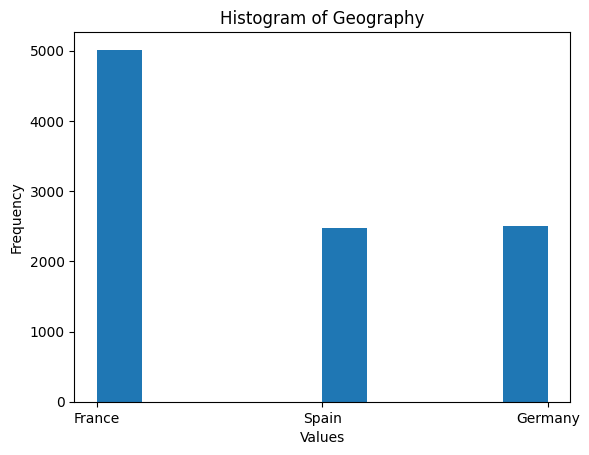

In [85]:
import matplotlib.pyplot as plt

plt.hist(df['Geography'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Geography')
plt.show()


In [86]:
# count of geography column
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

We have three Geographical areas in our dataset. France, Germany and Spain with France being the most appearing

## Encoding Categorical Data to Numeric

We will first split our data into train and test splits before encoding it to prevent data leakage.

In [87]:
#Prepare the data
X = df.drop('Exited', axis=1)
y = df['Exited']

### Performing Binary Encoding

In [88]:
# Split the data into training and testing sets
# we will use a test size of 0.2 and random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We will do binary encoding using LabelEncoder from sklearn. And we will fit and transform categorical variables in training data and transform the same categorical variables in test data.

In [89]:
#checking the column data types again
df.dtypes

RowNumber            int64
CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [90]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the label encoder
label_encoder = LabelEncoder()

# Perform label encoding on training data
X_train.loc[:, 'Gender'] = label_encoder.fit_transform(X_train['Gender'])

# Apply the transformation to the testing data
X_test.loc[:, 'Gender'] = label_encoder.transform(X_test['Gender'])

In [91]:
# Convert 'Gender' column to numeric type
X_train['Gender'] = X_train['Gender'].astype('int64')
X_test['Gender'] = X_test['Gender'].astype('int64')


## One Hot Encoding

### One hot encoding train data

We will perform one hot encoding on the "Geography" column to make it numerical. We will fit and transform the train set then transform the column as well in test set.

In [92]:
# instantiate ohe object
ohe = OneHotEncoder(sparse = False, handle_unknown = "ignore")

# fit ohe on small train data
ohe.fit(X_train[['Geography']])

# access the column names of 'Geography"
col_names = ohe.categories_[0]

# make a df with encoded geography
train_geography_encoded = pd.DataFrame(ohe.transform(X_train[["Geography"]]),
                               index = X_train.index,
                               columns = col_names)

# combine encoded 'Geography' with X_t and drop old 'Geography' column
X_train = pd.concat([X_train.drop("Geography", axis = 1), train_geography_encoded], axis = 1)

## One hot encoding test data

In [93]:
# df with encoded states
test_geography_encoded = pd.DataFrame(ohe.transform(X_test[['Geography']]),
                               index = X_test.index,
                               columns = col_names)

# combine encoded states with X_test and drop old 'Geography' column
X_test = pd.concat([X_test.drop("Geography", axis = 1), test_geography_encoded], axis = 1)

In [94]:
#Rechecking our X_test data types
X_test.dtypes

RowNumber            int64
CustomerId           int64
CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
France             float64
Germany            float64
Spain              float64
dtype: object

In [95]:
#Rechecking our X_train data types
X_train.dtypes

RowNumber            int64
CustomerId           int64
CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
France             float64
Germany            float64
Spain              float64
dtype: object

From the above, we note that we don't have any categorical data hence we can proceed with analysis.

In [96]:
X_train.head()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
9254,9255,15601116,686,1,32,6,0.00,2,1,1,179093.26,1.0,0.0,0.0
1561,1562,15766374,632,1,42,4,119624.60,2,1,1,195978.86,0.0,1.0,0.0
1670,1671,15716994,559,1,24,3,114739.92,1,1,0,85891.02,0.0,0.0,1.0
6087,6088,15730759,561,0,27,9,135637.00,1,1,0,153080.40,1.0,0.0,0.0
6669,6670,15797900,517,1,56,9,142147.32,1,0,0,39488.04,1.0,0.0,0.0


## Exploring Correlations

In [97]:
df.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [98]:
df1= df[[ 'CreditScore', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited']]
df1.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


From the above, we note that we do not have multi collinearity between our features since the correlations are below 0.05

### Correlations with our target variable "Exited"

In [99]:
# Calculate correlation matrix
correlation_matrix = df1.corr()

# Filter correlations above 0 for 'Exited' column
correlations_above_zero_exited = correlation_matrix['Exited'][correlation_matrix['Exited'] > 0]

# Print out correlations above 0 for 'Exited' column
print("Correlations above 0 for 'Exited':")
print(correlations_above_zero_exited)


Correlations above 0 for 'Exited':
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64


From the above we note that Age, Balance and Estimated Salary have some correlation with our target variable "Exited"

## Plotting Box Plot to Check for Outliers

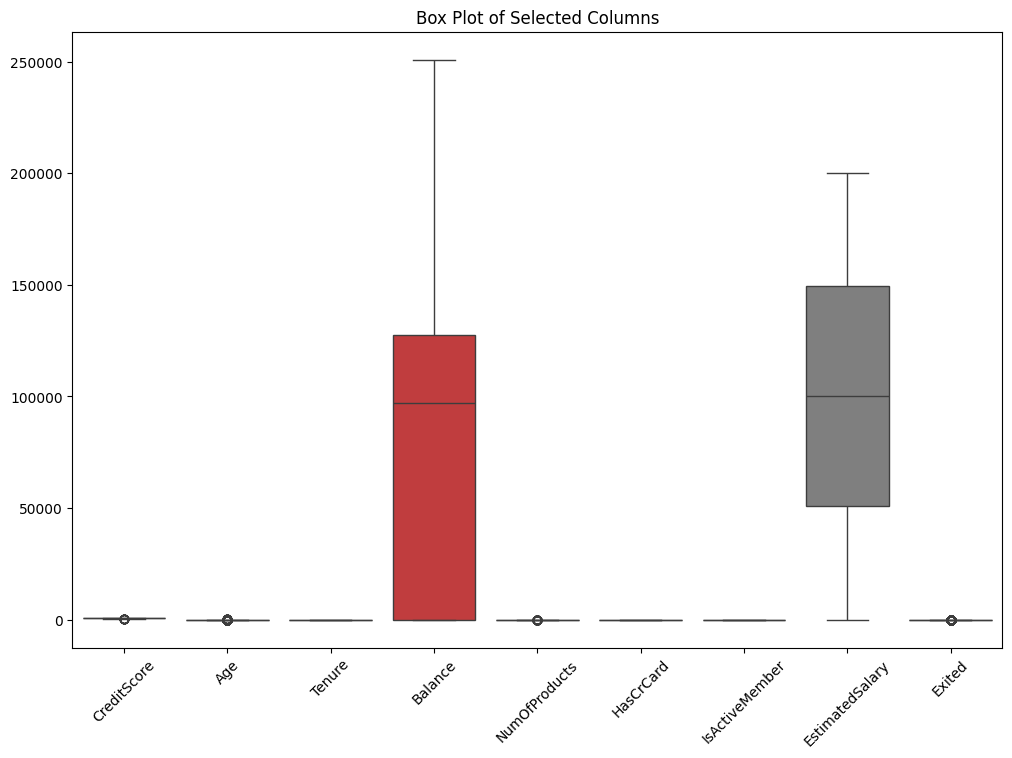

In [100]:

# Select the columns for the box plot
columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

# Create box plots for each column
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1[columns])
plt.title('Box Plot of Selected Columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


From the boxplot above, there are no outliers.

## Exploring 'Exited" Column

In [101]:
#getting customer churn count
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Here we note that there is a class imbalance in our dataset with class: 0 having 7963 values and class: 1 having 2037 values. We will need to balance this later.

In [102]:
# percentage of customers that churn
churned=df[df['Exited']==1].shape[0]
not_churned=df[df['Exited']==0].shape[0]
print(churned/(churned+not_churned))

0.2037


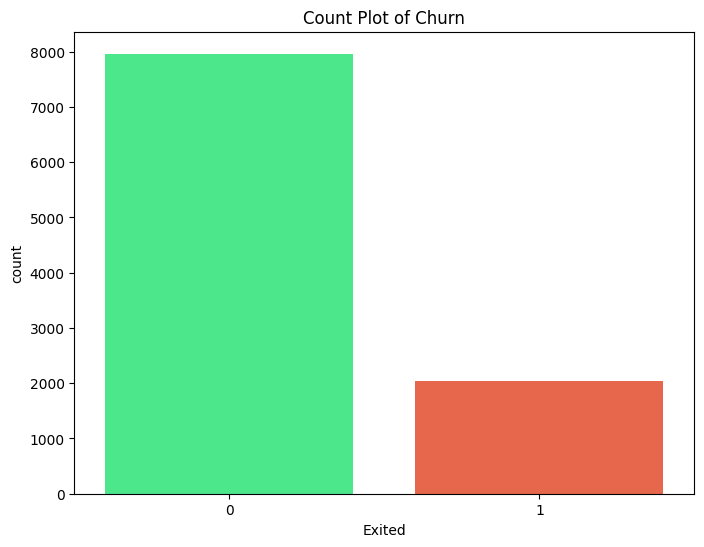

In [103]:
#getting churn visualization
# Define custom colors
colors = ["#33FF86","#FF5733"]  # Example custom colors

# Create count plot with custom colors
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=df, palette=colors)
plt.title('Count Plot of Churn')
plt.show()

The class imbalance is clearly displayed where we have more customers retained than those who have churned

In [104]:
df.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

## Distribution of Estimated Salary

<Figure size 1500x800 with 0 Axes>

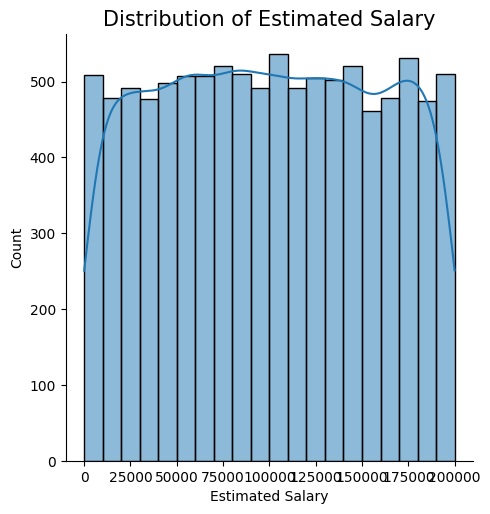

In [105]:
# plotting displot
plt.figure(figsize=(15,8))
sns.displot(df['EstimatedSalary'], bins=20, kde=True)
#setting labels
plt.title('Distribution of Estimated Salary', fontsize = 15)
plt.xlabel('Estimated Salary', fontsize = 10)
plt.show()

 The didtribution plot suggests that the salary values are evenly distributed or have a uniform distribution across the range.

## Distribution of Balances

<Figure size 1500x800 with 0 Axes>

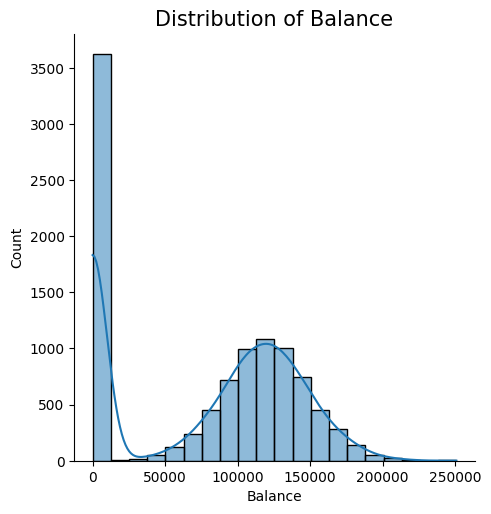

In [106]:
# plotting displot
plt.figure(figsize=(15,8))
sns.displot(df['Balance'], bins=20, kde=True)
#setting labels
plt.title('Distribution of Balance', fontsize = 15)
plt.xlabel('Balance', fontsize = 10)
plt.show()

From the Balance Distribution, besides the zero balances which are very high, the data is normally distributed.

##Churn Prediction Modelling

## Model Iterations

#### Performance Metrics:

Accuracy: Overall correctness of the model.

Precision: Proportion of true positives among all predicted positives.

Recall (Sensitivity): Proportion of actual positives correctly predicted by the model.

F1-score: Harmonic mean of precision and recall, balances precision and recall.

Area Under the ROC Curve (AUC-ROC): Measures the model's ability to discriminate between positive and negative classes

Precision focuses on the proportion of correctly identified positive cases among all cases predicted as positive. It is crucial when the cost of false positives is high, as it ensures that the positive predictions made by the model are indeed accurate.

Precision= TP/(TP+FP)

Recall (Sensitivity): Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify positive instances out of all actual positive instances. It answers the question: "Of all the actual positive instances, how many did the model correctly predict as positive?" Recall is calculated as the ratio of true positives (TP) to the sum of true positives and false negatives (FN):

Recall = TP/(TP+FN)
​Recall is important when it is crucial to capture all positive instances, even at the cost of higher false positives. It is especially relevant in scenarios where missing positive instances can have significant consequences.


## Logistic Regression
We will use Logistic regression as the baseline model as we iterate through different models such as decision trees and XGBoost then tune the models as well as we try to find the most accurate model.

1.  With Imbalanced Class Instances&Without Hyperparameter Tuning.

In [107]:
# Create a pipeline with StandardScaler and LogisticRegression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [108]:
# Predictions on the testing set
y_pred = pipeline.predict(X_test)

In [109]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

## Confusion Matrix

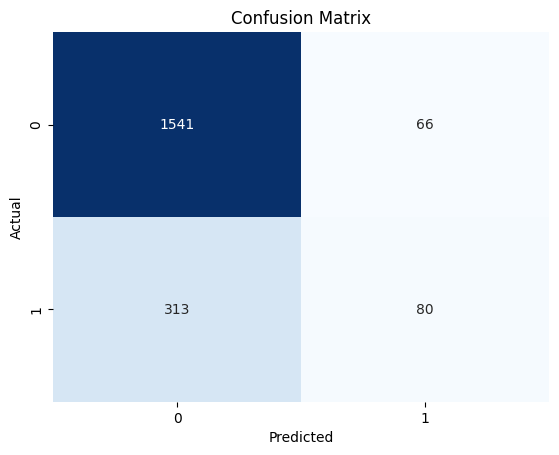

In [110]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true labels and predicted labels respectively

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


From the confusion matrix above, we note that we have a lot of False Positives (Predicting Customers have churned when they did not) and False Negatives(Predicting they have not churned while they have churned).

## ROC Curve

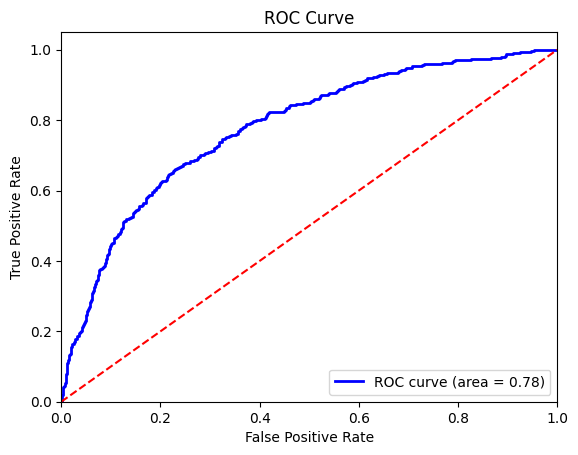

In [111]:
# Calculate probabilities for class 1
y_probs = pipeline.predict_proba(X_test)[:, 1]
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Calculate AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

From the ROC curve, we note that the True positive rate is still low and it doesnt stabilise. A good TP should the at about 0.9. For accurate predictions.

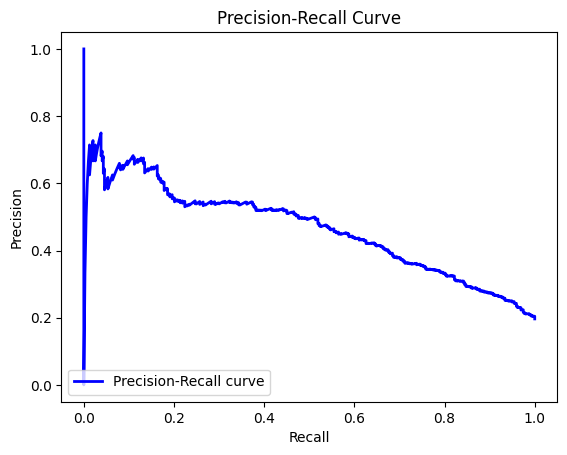

In [112]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
# Plot precision-recall curve
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [113]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Recall:", recall.mean())
# Calculate precision
average_precision = precision.mean()
print("Precision:", average_precision)

Accuracy: 0.8105
Recall: 0.7237691586776587
Precision: 0.35595487097724066


We have a somewhat high Accuracy and recall but precision is very low

## Dealing with class imbalance using SMOTE

It resamples the larger class of our taget variables and balances with the lesser class

In [114]:
# balancing the classes using SMOTE
# instantiating SMOTE
smote = SMOTE(random_state=42)
# fitting SMOTE on our data set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [115]:
# seeing if class imbalance has been solved
pd.Series(y_train_resampled).value_counts()

Exited
0    6356
1    6356
Name: count, dtype: int64

After balancing the classes of our target variable('Exited'), We see that they are now balanced. This reduces model bias.

#### Logistic Regression with Hyperparameter Tuning using GridSearchCV and Balanced class Instances:

In [116]:
# Define hyperparameters grid for Grid Search
param_grid ={
'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
'penalty': ['l2']  # Only 'l2' penalty for lbfgs solver
}

In [117]:
# Train a Logistic Regression model with hyperparameter tuning using GridSearch
log_reg = LogisticRegression(solver='liblinear', random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2']},
             scoring='accuracy')

In [118]:
# Best hyperparameters found
best_params = grid_search.best_params_

In [119]:
# Train the model with the best hyperparameters
best_log_reg = LogisticRegression(solver='liblinear', max_iter=1000, **best_params, random_state=42)
best_log_reg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=100, max_iter=1000, random_state=42, solver='liblinear')

In [120]:
# Predictions on the testing set
y_pred = best_log_reg.predict(X_test)

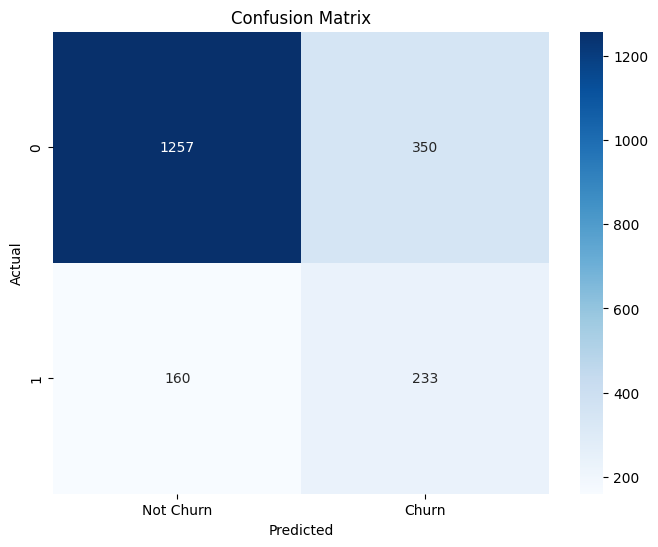

In [121]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [122]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.745
Precision: 0.3996569468267582
Recall: 0.5928753180661578


All the metrics, accuracy, precision and recall have gone down

## Decision Trees Model

## With balanced Class Instances and Parameter tuning.

In [123]:
# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [124]:
# Hyperparameter Tuning
param_grid ={
'criterion': ['gini', 'entropy'],
'max_depth': [None, 10, 20, 30, 40, 50],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'max_features': [None, 'sqrt', 'log2']}  # Remove 'auto' as a value
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [125]:
# Best hyperparameters found
best_params = grid_search.best_params_

In [126]:
# Train the model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [127]:
# Predictions on the testing set
y_pred = best_dt_classifier.predict(X_test)

In [128]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.7845
Precision: 0.4627450980392157
Recall: 0.6005089058524173


## Random Forest Model and XGBoost before Any Tuning

We chose to use Random Forest and XGBoost since they are boost the performance of decision trees. And hence we wish to explore if the models will outperform decisiontree classifier as the baseline model.

We will run Random Forest classifier and XGBoost with all features and default parameters to see how it performs before tuning it.

In [129]:
# definition a function for creating modesl
def create_models(seed=42):
    models =[]
    #appending the models to the model list.
    models.append((' XGB',  XGBClassifier(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed),))
    return models
models= create_models()

Classifier:  XGB, Accuracy: 0.855
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.67      0.51      0.58       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.75      2000
weighted avg       0.84      0.85      0.85      2000

Top 10 Features Importance:
NumOfProducts: 0.2693
IsActiveMember: 0.1715
Age: 0.1114
Germany: 0.0942
Gender: 0.0496
Balance: 0.0487
France: 0.0428
Spain: 0.0364
CreditScore: 0.0316
RowNumber: 0.0304


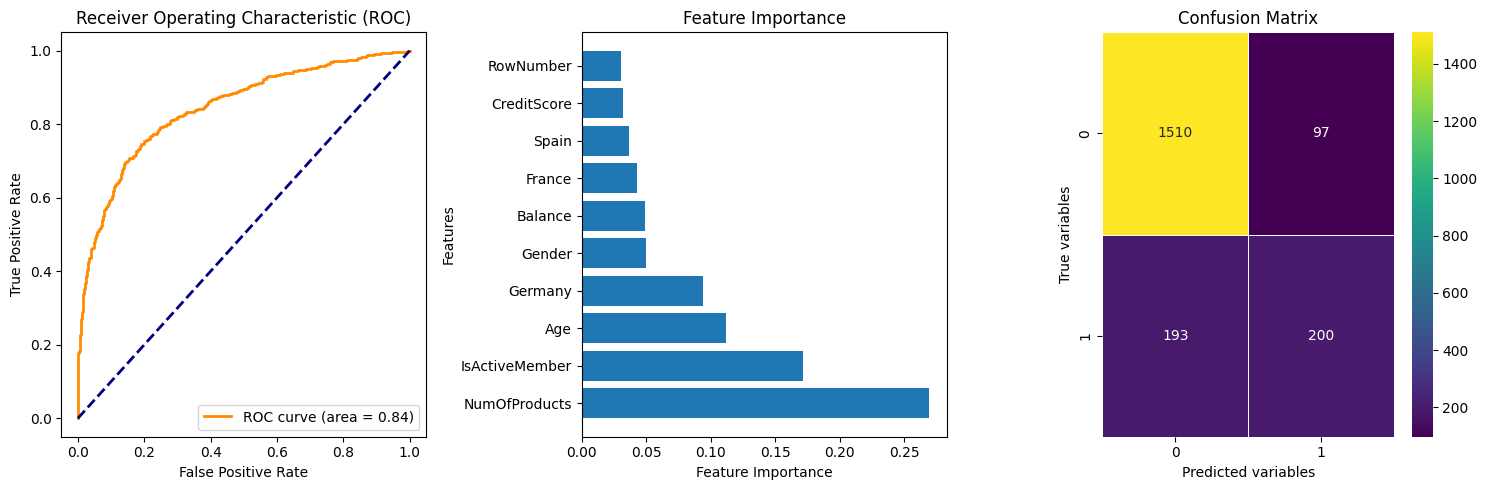

Classifier: random_forest, Accuracy: 0.8665
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.45      0.57       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.86      0.87      0.85      2000

Top 10 Features Importance:
Age: 0.2040
NumOfProducts: 0.1266
Balance: 0.1062
EstimatedSalary: 0.1011
RowNumber: 0.1005
CreditScore: 0.0997
CustomerId: 0.0990
Tenure: 0.0599
IsActiveMember: 0.0350
Germany: 0.0196


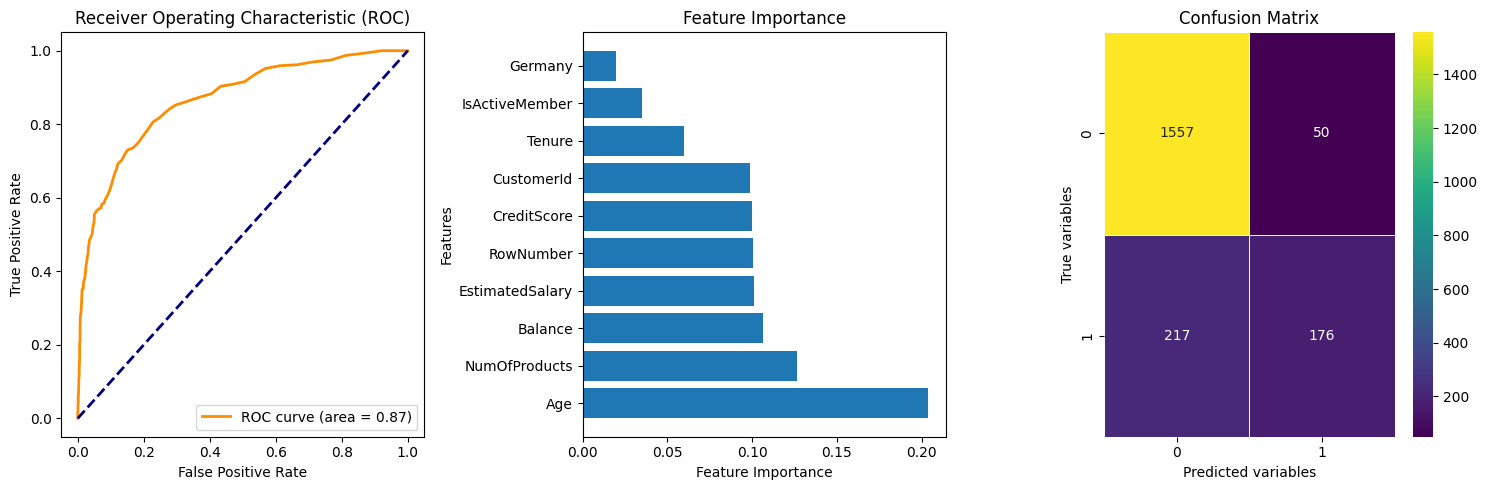

In [130]:
# creating a list of results, model name, and accuracy score
results = []
names = []
scoring = 'accuracy'

# Create a figure for each model
for name, model in models:
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Fit model with training data
    model.fit(X_train, y_train)
    # Make predictions with testing data
    predictions = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    # Append model name and accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # Print classifier accuracy
    print('Classifier: {}, Accuracy: {}'.format(name, accuracy))
    print(classification_report(y_test, predictions))

    # Calculate predicted probabilities for positive class
    y_proba = model.predict_proba(X_test)[:, 1]
    # getting fpr and tpr for roc
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('Receiver Operating Characteristic (ROC)')
    axes[0].legend(loc="lower right")

    # Feature importance for models that support it
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        # Zip feature names and their importance scores
        feature_importance_dict = dict(zip(X_train.columns, feature_importance))
        # Sort feature importance in descending order
        sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
        # Print feature importance
        print('Top 10 Features Importance:')
        for feature, importance in sorted_feature_importance[:10]:
            print('{}: {:.4f}'.format(feature, importance))

        # Plot feature importance
        features = [x[0] for x in sorted_feature_importance[:10]]
        importance = [x[1] for x in sorted_feature_importance[:10]]
        axes[1].barh(features, importance)
        axes[1].set_xlabel('Feature Importance')
        axes[1].set_ylabel('Features')
        axes[1].set_title('Feature Importance')

    # Visualizing model performance using confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)
    sns.heatmap(conf_matrix, annot=True, cmap="viridis", fmt="d", linewidths=.5, ax=axes[2])
    axes[2].set_title("Confusion Matrix")
    axes[2].set_xlabel("Predicted variables")
    axes[2].set_ylabel("True variables")

    # Adjust layout and spacing
    plt.tight_layout()
    # Display the plot
    plt.show()

## Evaluation on test data to check over and underfitting

In [131]:
# Create a figure for each model
for name, model in models:
    # Fit model with training data
    model.fit(X_train, y_train)
    # Make predictions with testing data
    predict_train = model.predict(X_train)
    # Calculate metrics
    accuracy = accuracy_score(y_train, predict_train)
    precision = precision_score(y_train, predict_train)
    recall = recall_score(y_train, predict_train)
    f1 = f1_score(y_train, predict_train)
    # Print classifier name and metrics
    print('Classifier:', name)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)


Classifier:  XGB
Accuracy: 0.974
Precision: 0.989100817438692
Recall: 0.8832116788321168
Classifier: random_forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


## Evaluation on test Data

In [132]:
# Create a figure for each model for test data
for name, model in models:
    # Fit model with training data
    model.fit(X_train, y_train)
    # Make predictions with testing data
    predictions = model.predict(X_test)
    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    # Print classifier name and metrics
    print('Classifier:', name)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)


Classifier:  XGB
Accuracy: 0.855
Precision: 0.6734006734006734
Recall: 0.5089058524173028
Classifier: random_forest
Accuracy: 0.8665
Precision: 0.7787610619469026
Recall: 0.44783715012722647


**Train Data** Classifier:  XGB

Accuracy: 0.974
Precision: 0.989100817438692
Recall: 0.8832116788321168

Classifier: random_forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

**Test Data** Classifier:  XGB

Accuracy: 0.855
Precision: 0.6734006734006734
Recall: 0.5089058524173028
F1-score: 0.5797101449275361

Classifier: random_forest
Accuracy: 0.8665
Precision: 0.7787610619469026
Recall: 0.44783715012722647
F1-score: 0.568659127625202

## Random Forest After Model Tuning

In [133]:
# Define a function to perform random search and evaluate the model
def perform_grid_search(classifier, param_grid):
    # Define the pipeline
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

    # Perform GridSearchCV
    random_search = GridSearchCV(estimator = pipe,
                       param_grid=param_grid,
                       scoring = 'accuracy',
                       cv=5)
    random_search.fit(X_train_resampled, y_train_resampled)

    # Get the best parameters
    best_params = random_search.best_params_
    print("Best Parameters:", best_params)

    # Evaluate the model on the test set
    y_pred = random_search.predict(X_test)
    y_pred_train = random_search.predict(X_train)

    # Calculate evaluation metrics for test
    accuracy_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)

    # Calculate evaluation metrics for train        n
    accuracy_train = accuracy_score(y_train, y_train)
    precision_train = precision_score(y_train, y_pred_train)
    recall_train= recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)

    # Print evaluation metrics for test
    print("Test Accuracy:", accuracy_test)
    print("Test Precision:", precision_test)
    print("Test Recall:", recall_test)
    print("Test F1 Score:", f1_test)

    # Print evaluation metrics for train
    print("Train Accuracy:", accuracy_train)
    print("Train Precision:", precision_train)
    print("Train Recall:", recall_train)
    print("Train F1 Score:", f1_train)

    # Classification report
    print("Classification Report:")
    #print(classification_report(y_test, y_pred))


    return  best_params, accuracy, random_search


In [134]:
classifier= RandomForestClassifier(random_state=42)
param_grid = [{'classifier__max_depth': [None, 2,6,10],
        'classifier__min_samples_split': [5,10]}]
best_params, accuracy, random_search = perform_grid_search(classifier, param_grid)

Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5}
Test Accuracy: 0.8525
Test Precision: 0.6331521739130435
Test Recall: 0.5928753180661578
Test F1 Score: 0.6123521681997373
Train Accuracy: 1.0
Train Precision: 0.986833855799373
Train Recall: 0.9574209245742092
Train F1 Score: 0.9719049089225069
Classification Report:


## XGBoost model after Parameter Tuning

In [135]:
# Instantiate XGBClassifier
clf = XGBClassifier()
# Fit XGBClassifier
clf.fit(X_train_resampled, y_train_resampled)
# Predict on training and test sets
training_preds = clf.predict(X_train_resampled)
test_preds = clf.predict(X_test)

In [136]:
# Define the hyperparameter grid
param_grid = {
'learning_rate': [0.1, 0.2],
'max_depth': [6,8],
'min_child_weight': [1, 2],
'subsample': [0.5, 0.7],
'n_estimators': [100],
}
# Create the GridSearchCV object
grid_clf = GridSearchCV(clf, param_grid,scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the data
grid_clf.fit(X_train_resampled, y_train_resampled)
grid_clf.fit(X_test,y_test)

best_parameters = grid_clf.best_params_

best_parameters

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.5}

After performing grid search and finding the best hyperparameters using GridSearchCV,the best model is used to make predictions on both the training and test sets.Accuracy scores are calculated for both the training and test sets

In [137]:
# Evaluate the model on the test set
y_pred = grid_clf.predict(X_test)

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train_resampled, training_preds)
train_recall = recall_score(y_train_resampled, training_preds)
train_precision = precision_score(y_train_resampled, training_preds)
train_f1 = f1_score(y_train_resampled, training_preds)
test_accuracy = accuracy_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Train Recall:", train_recall)
print("Train Precision:",train_precision)
print("Train F1 Score:", train_f1)
print("Test Accuracy:", test_accuracy)
print("Test Recall:", test_recall)
print("Test Precision:",test_precision)
print("Test F1 Score:", test_f1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Training Accuracy: 0.9708149779735683
Train Recall: 0.9638137193203272
Train Precision: 0.977501196744854
Train F1 Score: 0.9706092054186802
Test Accuracy: 0.9895
Test Recall: 0.9465648854961832
Test Precision: 1.0
Test F1 Score: 0.9725490196078431
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1607
           1       1.00      0.95      0.97       393

    accuracy                           0.99      2000
   macro avg       0.99      0.97      0.98      2000
weighted avg       0.99      0.99      0.99      2000



The model is XGBOOST which performs exceptionally well on unseen data in the testing dataset, maintaining a high accuracy of 98.95%.Recall metrics captures about 94.65% of the actual positive instances in the testing data.The model demonstrates exceptional accuracy, recall, and precision on both the training and testing datasets, indicating its ability to correctly identify positive instances.

In [138]:
# Get the best model
best_model = grid_clf.best_estimator_

# Get feature importances from the best model
feature_importance = best_model.feature_importances_

# Assuming X_train_resampled is your training feature matrix
# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': feature_importance})


# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
            Feature  Importance
7     NumOfProducts    0.158565
9    IsActiveMember    0.125882
4               Age    0.110288
12          Germany    0.086863
6           Balance    0.059050
3            Gender    0.057591
13            Spain    0.054953
8         HasCrCard    0.053518
5            Tenure    0.053464
1        CustomerId    0.050977
0         RowNumber    0.050282
10  EstimatedSalary    0.049071
2       CreditScore    0.047498
11           France    0.041999


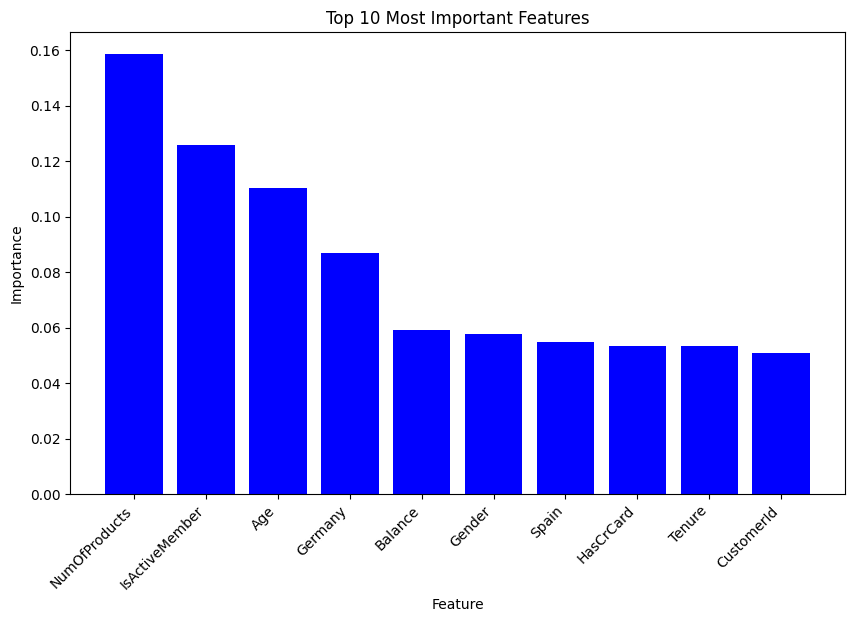

In [139]:
#Plotting the feature importance for Top 10 most important columns
# Select the top 10 features
top_10_features = feature_importance_df.head(10)
# Plot the feature importance using a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_features['Feature'], top_10_features['Importance'], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Most Important Features')
plt.xticks(rotation=45, ha='right')
plt.show()

We note that the top 3 factors contributing to customer churn are Number of Products, IsActiveMember and Age.

In [140]:
!pip install joblib


In [141]:
from sklearn.datasets import load_iris
import joblib

# Save the trained model to a file
joblib.dump( best_model, 'best_model.pkl')

['best_model.pkl']

In [142]:
pip install streamlit
